In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
%matplotlib inline

In [161]:
data=pd.read_csv('problem_2/problem_2_train.csv')
data.head(10)
cols=['memcreateddate','mobilepurchasedate']

In [162]:
data.drop(columns=cols,axis=1,inplace=True)

In [163]:
data.head(20)


,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,2851218,AN,7,500004,233,233,131,A,ADLD,500001,2018-02-08,4403,2018-02-13,5
1,2838330,AJ,10,226010,233,233,131,A,ADLD,226022,2018-02-04,4444,2018-02-08,12
2,2835781,AJ,2,110018,233,233,228,A,ADLD,110018,2018-02-03,4388,2018-02-12,9
3,2838589,AM,2,110018,233,233,228,B,ADLD,124001,2018-02-04,4092,2018-02-14,9
4,2855214,AN,21,110015,233,233,131,A,ADLD,201301,2018-02-09,4580,2018-02-14,8
5,2852784,AN,21,110015,233,233,131,B,ADLD,132001,2018-02-08,4580,2018-02-15,9
6,2844713,C,2,110018,233,233,131,A,ADLD,110059,2018-02-06,4094,2018-02-09,15
7,2829719,C,6,160059,233,233,131,B,ADLD,151001,2018-02-01,4549,2018-02-10,16
8,2833619,AN,3,560011,201,233,131,A,ADLD,560076,2018-02-03,4467,2018-02-08,17
9,2870579,AJ,5,380009,233,233,131,B,ADLD,390006,2018-02-14,4422,2018-02-20,11


In [164]:
from scipy import stats
num_df=data.select_dtypes(include=["number"])
idx=np.all(stats.zscore(num_df)<3,axis=1)
data[idx]

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,2851218,AN,7,500004,233,233,131,A,ADLD,500001,2018-02-08,4403,2018-02-13,5
1,2838330,AJ,10,226010,233,233,131,A,ADLD,226022,2018-02-04,4444,2018-02-08,12
2,2835781,AJ,2,110018,233,233,228,A,ADLD,110018,2018-02-03,4388,2018-02-12,9
3,2838589,AM,2,110018,233,233,228,B,ADLD,124001,2018-02-04,4092,2018-02-14,9
4,2855214,AN,21,110015,233,233,131,A,ADLD,201301,2018-02-09,4580,2018-02-14,8
5,2852784,AN,21,110015,233,233,131,B,ADLD,132001,2018-02-08,4580,2018-02-15,9
6,2844713,C,2,110018,233,233,131,A,ADLD,110059,2018-02-06,4094,2018-02-09,15
7,2829719,C,6,160059,233,233,131,B,ADLD,151001,2018-02-01,4549,2018-02-10,16
8,2833619,AN,3,560011,201,233,131,A,ADLD,560076,2018-02-03,4467,2018-02-08,17
9,2870579,AJ,5,380009,233,233,131,B,ADLD,390006,2018-02-14,4422,2018-02-20,11


Converting string date to time stamp

In [165]:
data['claimintdate'] = pd.to_datetime(data['claimintdate'])
data['pickupStartdate'] = pd.to_datetime(data['pickupStartdate'])

In [236]:
data.shape

(6250, 14)

# Converting features

In [167]:
d=dict(zip(list(data['mobmake'].unique()),list(np.arange(38))))
dtype=dict(zip(list(data['claimtype'].unique()),list(np.arange(len(data['claimtype'].unique())))))
dcat=dict(zip(list(data['custpincodecategory'].unique()),list(np.arange(len(data['custpincodecategory'].unique())))))

In [168]:
days=[]
mobmake=[]
claimtype=[]
custpincodecategory=[]
for i in range(data.shape[0]):
    days.append((data.loc[i].pickupStartdate-data.loc[i].claimintdate).days)
    mobmake.append(d[data.loc[i].mobmake])
    claimtype.append(dtype[data.loc[i].claimtype])
    custpincodecategory.append(dcat[data.loc[i].custpincodecategory])

In [169]:
data['days']=days

In [170]:
data.drop(columns=['claimintdate','pickupStartdate','mobmake','claimtype','custpincodecategory'],axis=1,inplace=True)

In [208]:
data['mobmake']=mobmake
data['claimtype']=claimtype
data['custpincodecategory']=custpincodecategory
data['new']=(data.deliverypartnerid+data.pickuppartnerid)*10
data.head(10)

,srno,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincode,servicecntrid,tat_in_days,days,mobmake,claimtype,custpincodecategory,new
0,2851218,7,500004,233,233,131,500001,4403,5,5,0,0,0,4660
1,2838330,10,226010,233,233,131,226022,4444,12,4,1,0,0,4660
2,2835781,2,110018,233,233,228,110018,4388,9,9,1,0,0,4660
3,2838589,2,110018,233,233,228,124001,4092,9,10,2,0,1,4660
4,2855214,21,110015,233,233,131,201301,4580,8,5,0,0,0,4660
5,2852784,21,110015,233,233,131,132001,4580,9,7,0,0,1,4660
6,2844713,2,110018,233,233,131,110059,4094,15,3,3,0,0,4660
7,2829719,6,160059,233,233,131,151001,4549,16,9,3,0,1,4660
8,2833619,3,560011,201,233,131,560076,4467,17,5,0,0,0,4340
9,2870579,5,380009,233,233,131,390006,4422,11,6,1,0,1,4660


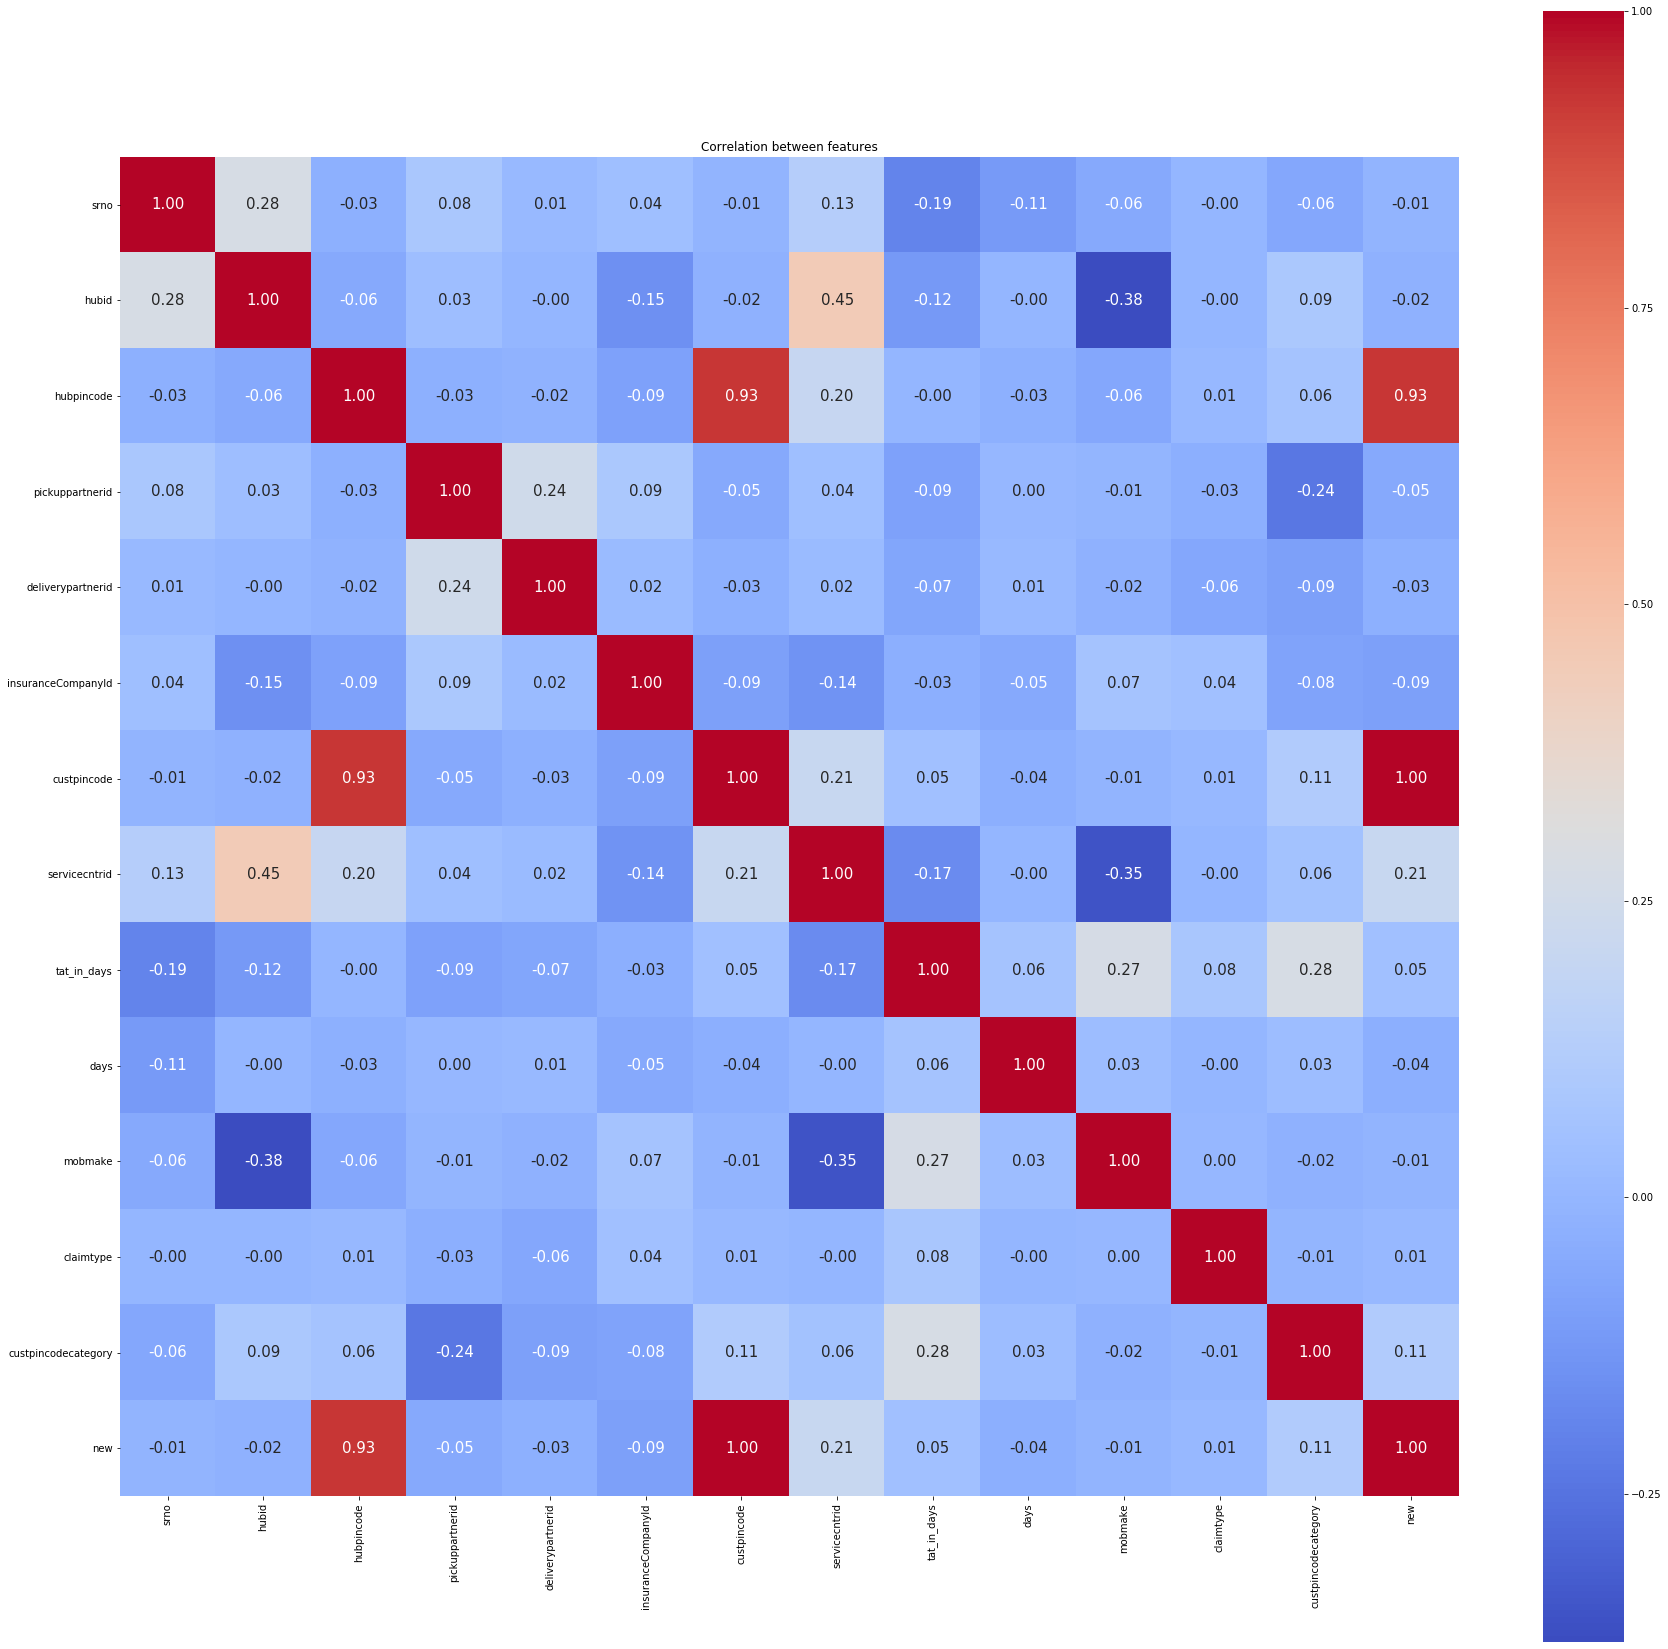

In [204]:
corr = data.corr()
plt.figure(figsize=(30, 30))
import seaborn as sns
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           cmap= 'coolwarm')
plt.title('Correlation between features');

In [240]:
X=data.drop(columns=['tat_in_days','hubid'],axis=1)
y=data['tat_in_days']

In [241]:
from sklearn.model_selection import train_test_split

In [242]:
X_train,X_test, y_train, y_test= train_test_split(X,y,random_state=1)


In [150]:
from sklearn.linear_model import LinearRegression

linreg=LinearRegression()
linreg.fit(X_train,y_train)
y_pred=linreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

4.7874515787740926


# Polynomial Regression

In [211]:
from sklearn.preprocessing import PolynomialFeatures 
  
poly = PolynomialFeatures() 
X_poly = poly.fit_transform(X_train)
X1_poly = poly.fit_transform(X_test)
  
poly.fit(X_poly, y_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train) 
y_pred=lin2.predict(X1_poly)
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

4.678349885113742


# Decision tree

In [212]:
from sklearn.tree import DecisionTreeRegressor  
  
# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
regressor.fit(X_train, y_train) 
y_pred = regressor.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

5.939070026789498


# Ridge Regression

In [262]:
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=1e-7,normalize=True)
ridgereg.fit(X_train,y_train)
y_pred = ridgereg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

4.753406620205999


# Lasso regression

In [263]:
from sklearn.linear_model import Lasso

lassoreg = Lasso(alpha=1e-7,normalize=True, max_iter=1e5)
lassoreg.fit(X_train,y_train)
y_pred = lassoreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

4.753407371620868


# So using ploynomial regression 

Filtering test data

In [228]:
test=pd.read_csv('problem_2/problem_2_test.csv')
cols=['memcreateddate','mobilepurchasedate']
test.drop(columns=cols,axis=1,inplace=True)
test['claimintdate'] = pd.to_datetime(test['claimintdate'])
test['pickupStartdate'] = pd.to_datetime(test['pickupStartdate'])
d=dict(zip(list(test['mobmake'].unique()),list(np.arange(len(test['mobmake'].unique())))))
dtype=dict(zip(list(test['claimtype'].unique()),list(np.arange(len(test['claimtype'].unique())))))
dcat=dict(zip(list(test['custpincodecategory'].unique()),list(np.arange(len(test['custpincodecategory'].unique())))))
days=[]
mobmake=[]
claimtype=[]
custpincodecategory=[]
for i in range(test.shape[0]):
    days.append((test.loc[i].pickupStartdate-test.loc[i].claimintdate).days)
    mobmake.append(d[test.loc[i].mobmake])
    claimtype.append(dtype[test.loc[i].claimtype])
    custpincodecategory.append(dcat[test.loc[i].custpincodecategory])
test['days']=days
test.drop(columns=['claimintdate','pickupStartdate','mobmake','claimtype','custpincodecategory'],axis=1,inplace=True)
test['mobmake']=mobmake
test['claimtype']=claimtype
test['custpincodecategory']=custpincodecategory
test['new']=(test.deliverypartnerid+test.pickuppartnerid)*10
X_test=test.drop(columns=['hubid'],axis=1)

Training polynomial model in whole train data

In [237]:
X=data.drop(columns=['tat_in_days','hubid'],axis=1)
y=data['tat_in_days']
poly = PolynomialFeatures() 
X_poly = poly.fit_transform(X)
  
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Getting predicted values

In [238]:
X_poly = poly.fit_transform(X_test)
lst=lin2.predict(X_poly)

In [239]:
len(lst)

2116

Saving answer to file

In [234]:
ans = pd.DataFrame(lst)
ans.to_csv("problem2_answer.csv")